# CH.2

## Perceptron

In [21]:
import numpy as np

class Perceptron(object):
    """
    Paramters
    -----------
    eta: float
        Learning rate (between 0.0 and 1.0)
    n_iter: int
        Passes over the training dataset
    random_state: int
        Random number generator seed for random weight initialization
    
    Attributes
    -----------
    w_: 1d-array
        Weights after fitting
    errors_: list
        # of misclassification (updates) in each epoch

    """
    # '__' in '__init__' is two chr underline, args inside are self and all parameters will be used
    # self let us use the attribute in the whole class
    def __init__(self, lr = 0.1, n_iter = 50, random_state = 1):
        self.lr = lr
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """Fitting training data by the model:
        y = Xi * wi
        Parameters
        -----------
        X: (array-like), shape = (n_samples, m_features)
        y: (array-like), shape = (n_samples)
        Target values
        
        Returns
        --------
        self: object
        """
        # Generating the initial weights, by given low variance and mean zero.
        # But I think it's okay in Perceptron to use 0 weights as initial weights.
        self.w_ = np.random.RandomState(self.random_state).normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            # Running all sample and update the weight before get output. In this case, is 100 times.
            for xi, target in zip(X, y):
                update = self.lr * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update * 1
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate the net input, the original y_hat"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class labels, arguments: 1st is condition, 2nd is true return, 3rd is false return"""
        return np.where(self.net_input(X) >= 0.0, 1.0, -1.0)

In [22]:
import pandas as pd

df = pd.read_csv('https://archive.ics.uci.edu/ml/'
        'machine-learning-databases/iris/iris.data', header = None)
df.tail()

,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


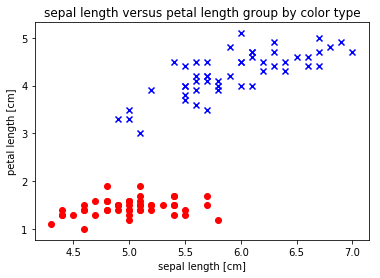

In [23]:
import matplotlib.pyplot as plt

## give target value and turn it into two classes -1 and 1
y = df.iloc[:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[:100, [0,2]].values
plt.scatter(X[:50, 0], X[:50, 1], color = 'red', marker = 'o', label = 'setosa')
plt.scatter(X[50:, 0], X[50:, 1],color = 'blue', marker = 'x', label = 'versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('sepal length versus petal length group by color type')
plt.show()

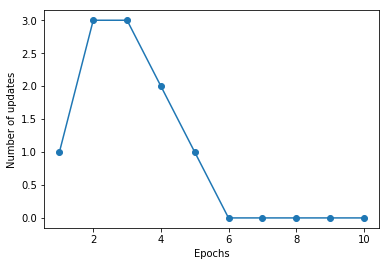

In [24]:
# Only the specified argument will be change or they will be keep default
ppn = Perceptron(lr = 0.1, n_iter = 10)
ppn.fit(X, y)
# Python won't take acount the end value, so we use range(1, 11)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

In [25]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution = 0.02):
    '''setup'''
    # Define the order possible used markers and colors. There would be error if we had more categories than pre-set. 
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    
    # Define the number of colors
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # To scale all data points in center of the plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    
    ## xx1, xx2 in shape of (305, 235): len(2nd argument) as row num, len(1st argument) as col num
    ## 1st list: repeat 1st argument for len(2nd argument) rows
    ## 2nd list: repeat every elements in 2nd argument len(1st argument) times for len(2nd argument) rows
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, step = resolution), 
                           np.arange(x2_min, x2_max, step = resolution))
    
    # Return the flat vector (1 * n)
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    #fill the color by border given by stepped array xx1 and xx2
    plt.contourf(xx1, xx2, Z, alpha = 0.1, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot sample with label 1 and label -1 separately
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], 
                    y = X[y == cl, 1], 
                    alpha = 0.8, 
                    c = colors[idx], 
                    marker = markers[idx], label = cl, 
                    edgecolor = 'black')

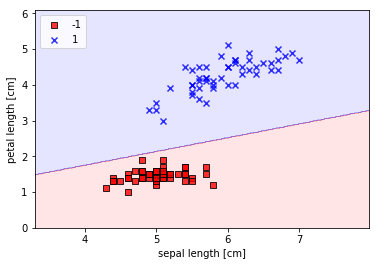

In [26]:
# Implement defined function
plot_decision_regions(X, y, classifier = ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc = 'upper left')
plt.show()

Note: The Proceptron can only do the classification on linear separatable data set.
The definition of linear separatable is well define by Wikipedia: https://en.wikipedia.org/wiki/Linear_separability

## Adaline with GD

In [ ]:
class AdalineGD(object):
    """ADAptive Linear NEuron classifier
    
    Parameters
    -----------
    eta: float
        Learing rate(0.0, 1.0)
    n_iter: int
        Passes over the training dataset 
    random_state: int
        Random number generator seed for randomly get initial weights
    
    Attributes
    -----------
    w_: 1d-array
        Weights after fitting
    cost_: list
        SSE cost function of each epoch
    
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = 1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y):
        """Fit training data
        
        Parameters
        -----------
        X: array-like, shape = (n_samples, m_features)
        y: array-like, shape = n_samples, target values
        
        Return
        -------
        self: object
        
        """
        ran_gen = np.random.RandomState(self.random_state)
        self.w_ = ran_gen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors ** 2).sum() / 2.0
            self.cost_.append(cost)
        return self
            
    def net_input(self, X):
        return X.dot(self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
    

In [ ]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10, 4))
ada1 = AdalineGD(n_iter = 10, eta = 0.01,).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1), np.log10(ada1.cost_), marker = 'o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log_sse')
ax[0].set_title('Adaline_lr 0.01')

ada2 = AdalineGD(n_iter = 10, eta = 0.0001,).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1), np.log10(ada2.cost_), marker = 'o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('log_sse')
ax[1].set_title('Adaline_lr 0.0001')
plt.show()

In [ ]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada = AdalineGD(n_iter = 15, eta = 0.01)
ada.fit(X_std, y)

plot_decision_regions(X_std, y, classifier = ada)
plt.title('Adaline-GD with standardized data')
plt.show()

In [ ]:
plt.plot(range(1, len(ada.cost_) + 1), ada.cost_, marker = 'o')
plt.xlabel('Epochs')
plt.ylabel('sse')
plt.show()

## Adaline with SGD

In [ ]:
class AdalineSGD(object):
    """
    
    Parameters
    -----------
    
    Attributes
    -----------
    
    
    """
    
    def __init__(self, eta = 0.01, n_iter = 50, random_state = None, shuffle = True):
        self.eta = eta
        self.shuffle = shuffle
        self.random_state = random_state
        self.n_iter = n_iter
        
    def fit(self, X, y):
        """
        Parameters
        -----------
        
        Returns
        --------
        
        
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y)
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
        
    def _initialize_weights(self, m)
    
    def _shuffle(self, X, y):
        r = ran_gen.permutation(len(y))
        return X[r], y[r]
    
    def _update_weights(self, xi, target):
        output = self.activation(self.net_input(xi))
        error = (output - target)
        self.w_[0] += self.eta * error
        self.w_[1:] += self.eta * xi.dot(error)
        cost = 0.5 * error ** 2
        return cost
    
    def net_input(self, X):
        return np.dot(self.w_[1:], X) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        np.where(self.actication(self.net_input(X)) >= 0, 1, -1)

# CH.3